# 필수과제1
- 타이타닉 데이터를 가지고 위의 과적합이 변경되는지 체크해 주세요!
- 타이타닉 데이터 전처리에 대해서 요약하여 꼭 정리한 내용도 보여주셔야 합니다.

In [273]:
# 경고무시
import warnings
warnings.filterwarnings(action  = 'ignore')
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score #Confusion matrix 수업 때 진행할 예정
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score#임포트
import numpy as np
import pandas as pd
titanic = sns.load_dataset('titanic')

In [274]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 1.데이터 전처리
- 칼럼 deck, alive , embarked_town , adult_male,who, class탈락 ( deck은 결측치 너무 많음, 나머지는 중복되는 칼럼 존재)


## 1.1 데이터 기본 정보 확인

In [275]:
titanic = titanic [['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',     'embarked',      'alone']]
titanic.info(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [276]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [277]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.271832
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,1.000000


## 1.2 결측치 처리
- age(결측치 많음), embarked(2개의 행) 칼럼

### ㄱ. age 처리
- 관여 칼럼 : sibsp, parch, pclass, sex, embarked, fare

In [278]:
age_nan_df = titanic[titanic.age.isna()]
for idx in age_nan_df.index:
  temp_df = titanic
  # sex 같게
  temp_df = temp_df[temp_df['sex']== age_nan_df['sex'][idx]]
  # pclass 같게
  temp_df = temp_df[temp_df['pclass']== age_nan_df['pclass'][idx]]
  # embarked 같게
  temp_df = temp_df[temp_df['embarked']== age_nan_df['embarked'][idx]]
  # alone 같게
  temp_df = temp_df[temp_df['alone']== age_nan_df['alone'][idx]]
  titanic['age'][idx]= temp_df['age'].mean()

### ㄴ. embarked 처리

In [279]:
titanic[titanic.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
61,1,1,female,38.0,0,0,80.0,NaN,True
829,1,1,female,62.0,0,0,80.0,NaN,True


In [280]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [281]:
# embarked - S가 압도적으로 많으므로 S로 결측치 대체
titanic['embarked'][61] =  'S'
titanic['embarked'][829] =  'S'

## 1.3 범주형 변수
- pclass, sex, embarked, alone

### ㄱ. pclass
- class 별 개수 차이도 큼
- 생존확률 차이도 큼
- 원핫인코딩!

In [282]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [283]:
titanic.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [284]:
titanic = pd.get_dummies(titanic, prefix = ['OneHot_Pclass'], columns = ['pclass'])
titanic

,survived,sex,age,sibsp,parch,fare,embarked,alone,OneHot_Pclass_1,OneHot_Pclass_2,OneHot_Pclass_3
0,0,male,22.000000,1,0,7.2500,S,False,0,0,1
1,1,female,38.000000,1,0,71.2833,C,False,1,0,0
2,1,female,26.000000,0,0,7.9250,S,True,0,0,1
3,1,female,35.000000,1,0,53.1000,S,False,1,0,0
4,0,male,35.000000,0,0,8.0500,S,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.000000,0,0,13.0000,S,True,0,1,0
887,1,female,19.000000,0,0,30.0000,S,True,1,0,0
888,0,female,21.877551,1,2,23.4500,S,False,0,0,1
889,1,male,26.000000,0,0,30.0000,C,True,1,0,0


### ㄴ. sex

In [285]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [286]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [287]:
for i in range(len(titanic)): # 0이면 male, 1이면 female로 변경
  if titanic['sex'][i]== 'male':
    titanic['sex'][i]=0
  else:
    titanic['sex'][i]=1

### ㄷ. embarked
- 개수 : S > C > Q
- 생존확률 : C > Q > S
- 원핫 인코딩으로 변경

In [288]:
titanic['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [289]:
titanic.groupby('embarked')['survived'].mean()

embarked
C    0.553571
Q    0.389610
S    0.339009
Name: survived, dtype: float64

In [290]:
titanic.groupby('embarked')['fare'].mean()

embarked
C    59.954144
Q    13.276030
S    27.243651
Name: fare, dtype: float64

In [291]:
titanic = pd.get_dummies(titanic, prefix = ['OneHot_embarked'], columns = ['embarked'])
titanic

,survived,sex,age,sibsp,parch,fare,alone,OneHot_Pclass_1,OneHot_Pclass_2,OneHot_Pclass_3,OneHot_embarked_C,OneHot_embarked_Q,OneHot_embarked_S
0,0,0,22.000000,1,0,7.2500,False,0,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,False,1,0,0,1,0,0
2,1,1,26.000000,0,0,7.9250,True,0,0,1,0,0,1
3,1,1,35.000000,1,0,53.1000,False,1,0,0,0,0,1
4,0,0,35.000000,0,0,8.0500,True,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.000000,0,0,13.0000,True,0,1,0,0,0,1
887,1,1,19.000000,0,0,30.0000,True,1,0,0,0,0,1
888,0,1,21.877551,1,2,23.4500,False,0,0,1,0,0,1
889,1,0,26.000000,0,0,30.0000,True,1,0,0,1,0,0


### ㄹ. alone
- SIbsp, Parch와 중복 탈락!

In [292]:
titanic = titanic[['survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'OneHot_Pclass_1', 'OneHot_Pclass_2', 'OneHot_Pclass_3',
       'OneHot_embarked_C', 'OneHot_embarked_Q', 'OneHot_embarked_S']]

## 1.4 연속형 변수
 - age , sibsp , parch , fare

### ㄱ. age
- 20~40대 사람들 많이 사망
- 아기, 청소년은 압도적으로 많이 살고, 중년보다는 노년이 생존


survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

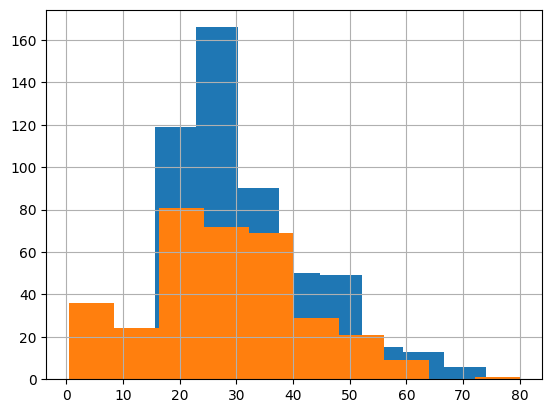

In [293]:
titanic.groupby('survived').age.hist()

### ㄴ. sibsp

In [294]:
titanic.groupby('sibsp')['survived'].mean()

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64

survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: sibsp, dtype: object

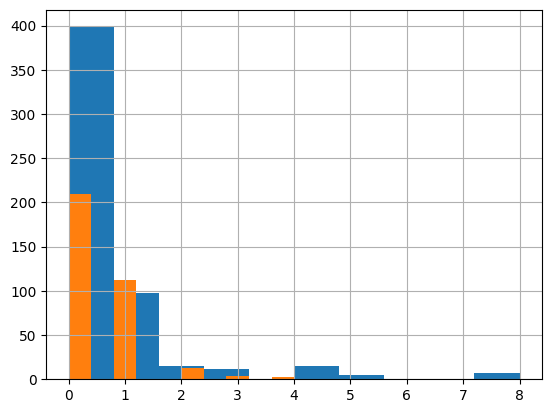

In [295]:
titanic.groupby('survived').sibsp.hist()

### ㄷ. parch

In [296]:
titanic.groupby('parch')['survived'].mean()

parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64

survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: parch, dtype: object

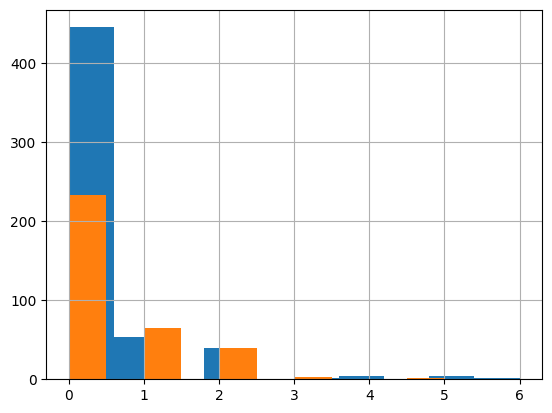

In [297]:
titanic.groupby('survived').parch.hist()

### ㄹ. fare

survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: fare, dtype: object

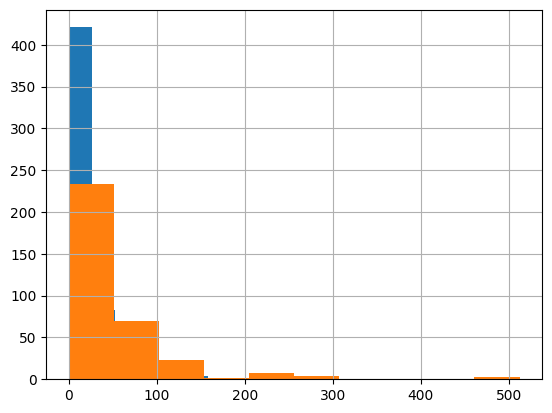

In [298]:
titanic.groupby('survived').fare.hist()

## 1.5 정규화
- scaler 필요 없음 : survived, sex, OneHot_xxx
age, sibsp, parch, fare

- MinMaxScaler : age, sibsp, parch
- RobustScaler : fare

In [ ]:
# MinMax Scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
cols = ["age",'sibsp','parch']
for col in cols:
  #2차원 ndarray로 변환
  items = np.array(titanic[col]).reshape(-1,1)

  # 변형 객체 생성
  minmax_scaler = MinMaxScaler()

  # 훈련데이터의 모수 분포 저장
  minmax_scaler.fit(items)

  # 훈련 데이터 스케일링
  items_scaled = minmax_scaler.transform(items)

  #transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
  # items_df_scaled = pd.DataFrame(data=items_scaled)
  # print('feature들의 최솟값')
  # print(items_df_scaled.min())
  # print('\nfeature들의 최댓값')
  # print(items_df_scaled.max())

  # 칼럼 추가
  feat_name = 'MinMax_Scale_'+col
  titanic[feat_name]= items_scaled

In [305]:
# RobustScaler
import numpy as np
from sklearn.preprocessing import RobustScaler
cols = ["fare"]
for col in cols:
  #2차원 ndarray로 변환
  items = np.array(titanic[col]).reshape(-1,1)

  # 변형 객체 생성
  robust_scaler = RobustScaler()

  # 훈련데이터의 모수 분포 저장
  robust_scaler.fit(items)

  # 훈련 데이터 스케일링
  items_scaled = robust_scaler.transform(items)

  #transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
  # items_df_scaled = pd.DataFrame(data=items_scaled)
  # print('feature들의 최솟값')
  # print(items_df_scaled.min())
  # print('\nfeature들의 최댓값')
  # print(items_df_scaled.max())

  # 칼럼 추가
  feat_name = 'Robust_Scale_'+col
  titanic[feat_name]= items_scaled

In [306]:
titanic

,survived,sex,age,sibsp,parch,fare,OneHot_Pclass_1,OneHot_Pclass_2,OneHot_Pclass_3,OneHot_embarked_C,OneHot_embarked_Q,OneHot_embarked_S,MinMax_Scale_age,MinMax_Scale_sibsp,MinMax_Scale_parch,Robust_Scale_fare
0,0,0,22.000000,1,0,7.2500,0,0,1,0,0,1,0.271174,0.125,0.000000,-0.312011
1,1,1,38.000000,1,0,71.2833,1,0,0,1,0,0,0.472229,0.125,0.000000,2.461242
2,1,1,26.000000,0,0,7.9250,0,0,1,0,0,1,0.321438,0.000,0.000000,-0.282777
3,1,1,35.000000,1,0,53.1000,1,0,0,0,0,1,0.434531,0.125,0.000000,1.673732
4,0,0,35.000000,0,0,8.0500,0,0,1,0,0,1,0.434531,0.000,0.000000,-0.277363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.000000,0,0,13.0000,0,1,0,0,0,1,0.334004,0.000,0.000000,-0.062981
887,1,1,19.000000,0,0,30.0000,1,0,0,0,0,1,0.233476,0.000,0.000000,0.673281
888,0,1,21.877551,1,2,23.4500,0,0,1,0,0,1,0.269635,0.125,0.333333,0.389604
889,1,0,26.000000,0,0,30.0000,1,0,0,1,0,0,0.321438,0.000,0.000000,0.673281


# 2. 과적합 변경 확인

In [311]:
# 타겟 데이터 분리
features = titanic.drop(labels='survived',axis=1)
label = titanic['survived']

## 2.1 Train, test, split
- max_depth를 지정했더니 0.98 에서 0.82로 정확도 감소
- 하이퍼파라미터 사용하여 과적합 방지

In [313]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=111)

In [314]:
model = DecisionTreeClassifier()
model_sp1 = DecisionTreeClassifier(random_state=111, max_depth=3)
model.fit(X_train, y_train) #모델 학습
model_sp1.fit(X_train, y_train) #모델 학습
pred_train = model.predict(X_train) #train 예측
pred_test = model.predict(X_test) # test예측

pred_train_sp = model_sp1.predict(X_train) #train 예측
pred_test_sp = model_sp1.predict(X_test) # test예측

In [315]:
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.9845505617977528
0.7653631284916201


In [316]:
print(accuracy_score(y_train, pred_train_sp))
print(accuracy_score(y_test, pred_test_sp))

0.824438202247191
0.8100558659217877


## 2.2 교차검증을 통해 과적합 나눠지는지 확인

### 2.2.1 KFold 모델로 진행

In [317]:
from sklearn.model_selection import KFold

kfold= KFold(n_splits=5) #데이터셋을 분리하는 것

cv_accuracy_train=[]
cv_accuracy_test=[]
kf_model = DecisionTreeClassifier(random_state=111, max_depth=3)

In [318]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [320]:
n_iter = 0 #5번 진행하니 초깃값 설정

for train_idx, test_idx in kfold.split(features):
    X_train, X_test = features.iloc[train_idx], features.iloc[test_idx]
    y_train, y_test = label.iloc[train_idx], label.iloc[test_idx]

    #학습을 위해서 dt배우기
    kf_model.fit(X_train, y_train)
    #예측
    kf_pred_train = kf_model.predict(X_train)
    df_pred_test = kf_model.predict(X_test)

    #정확도를 5번 측정하면서 값에 넣을 것이니
    n_iter +=1
    accuracy_train = np.round(accuracy_score(y_train, kf_pred_train),4)
    accuracy_test = np.round(accuracy_score(y_test, df_pred_test),4)

    print('\n{} 번 train 교차 검증 정확도 :{} ,test 교차 검증 정확도 :{} '.format(n_iter,accuracy_train, accuracy_test))

    cv_accuracy_train.append(accuracy_train)
    cv_accuracy_test.append(accuracy_test)
print('')
print('train 평균 정확도',np.mean(cv_accuracy_train))
print('test 평균 정확도',np.mean(cv_accuracy_test))


1 번 train 교차 검증 정확도 :0.8258 ,test 교차 검증 정확도 :0.8156 

2 번 train 교차 검증 정확도 :0.8205 ,test 교차 검증 정확도 :0.8146 

3 번 train 교차 검증 정확도 :0.8289 ,test 교차 검증 정확도 :0.8034 

4 번 train 교차 검증 정확도 :0.8429 ,test 교차 검증 정확도 :0.7697 

5 번 train 교차 검증 정확도 :0.8107 ,test 교차 검증 정확도 :0.8258 

train 평균 정확도 0.82576
test 평균 정확도 0.80582


### 2.2.2 Skf 모델로 진행

In [321]:
from sklearn.model_selection import StratifiedKFold

skf_iris = StratifiedKFold(n_splits=3)
cnt_iter=0

In [ ]:
skf_iris

In [323]:
n_iter=0

skf_cv_accuracy_train = []
skf_cv_accuracy_test = []
skf_model = DecisionTreeClassifier(random_state=111, max_depth=3)

for train_idx, test_idx in skf_iris.split(features, label):
    X_train, X_test = features.iloc[train_idx], features.iloc[test_idx]
    y_train, y_test = label.iloc[train_idx], label.iloc[test_idx]

    #학습을 위해서 dt배우기
    skf_model.fit(X_train, y_train)
    #예측
    skf_pred_train = skf_model.predict(X_train)
    skf_pred_test = skf_model.predict(X_test)

    #정확도를 5번 측정하면서 값에 넣을 것이니
    n_iter +=1
    accuracy_train = np.round(accuracy_score(y_train, skf_pred_train),4)
    accuracy_test = np.round(accuracy_score(y_test, skf_pred_test),4)

    print('\n{} 번 train 교차 검증 정확도 :{} ,test 교차 검증 정확도 :{} '.format(n_iter,accuracy_train, accuracy_test))

    skf_cv_accuracy_train.append(accuracy_train)
    skf_cv_accuracy_test.append(accuracy_test)
print('')
print('train 평균 정확도',np.mean(skf_cv_accuracy_train))
print('test 평균 정확도',np.mean(skf_cv_accuracy_test))


1 번 train 교차 검증 정확도 :0.8333 ,test 교차 검증 정확도 :0.798 

2 번 train 교차 검증 정확도 :0.8182 ,test 교차 검증 정확도 :0.8182 

3 번 train 교차 검증 정확도 :0.8316 ,test 교차 검증 정확도 :0.8114 

train 평균 정확도 0.8277
test 평균 정확도 0.8092


# 3. 결론
- 데이터만 split 한 후, 파라미터 설정하지 않고 정확도를 확인 했을 때는 train : 0.9845505617977528 , test : 0.7653631284916201 로 train이 더 많이 높다. 즉 과적합이 발생한 것이다.
- 반면 파라미터를 설정한 이후로는 train: 0.82, test : 0.81 로 test는 높아지고, train은 낮아진 모습을 볼 수 있다. 즉, 과적합이 해결된 것이다.
- 이후 KFold, SKf 모델로 진행했을 때는 대체적으로 정확도가 train : 0.82 , test : 0.80으로 나오는 모습을 확인 할 수 있다. 타이타닉 데이터의 경우 다중분류가 아니라 이중분류이기 때문에 KF와 SKf 차이가 적은 것으로 생각된다.